Import packages

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Load and read CSV

In [20]:
file_path = r'C:\Users\vgrec\Desktop\Coffee Sales\Coffee_Sales.csv'
df = pd.read_csv(file_path)

### **Exploratory Data Analysis (EDA)**

In [21]:
#Dimentions of the data
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 1133, and columns are 6.


In [22]:
print(df.size)

6798


In [23]:
#Display the first few rows of data
print("First few rows of data:")
print(df.head())

First few rows of data:
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


In [24]:
#Get information about the dataset
print("Dataset information:")
print(df.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB
None


In [25]:
# Basic statistics
print("Basic statistics:")
print(df.describe())
print(df.describe(include=['object']))

Basic statistics:
             money
count  1133.000000
mean     33.105808
std       5.035366
min      18.120000
25%      28.900000
50%      32.820000
75%      37.720000
max      40.000000
              date                 datetime cash_type                 card  \
count         1133                     1133      1133                 1044   
unique         150                     1133         2                  446   
top     2024-07-30  2024-03-01 10:15:50.520      card  ANON-0000-0000-0012   
freq            24                        1      1044                   88   

                coffee_name  
count                  1133  
unique                    8  
top     Americano with Milk  
freq                    268  


In [26]:
# Check the dublicated data
print("The dublicated data:")
print(df.duplicated().sum())

The dublicated data:
0


In [27]:
# Check for missing values
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


### *Conclusions:*
- *The dataset contains 1133 records and 6 columns, with one column being numeric and the remaining columns categorical.*
- *There are no duplicate records in the dataset, which is a positive aspect for further analysis.*
- *89 missing values are present in the 'card' column.*
- *The basic statistics for the 'money' column indicate an average coffee price of approximately 33.11 units with minor deviations.*
- *The 'coffee_name' column shows that 'Americano with Milk' has the highest sales volume.*
- *For further time-based analysis, the date and datetime columns, which are currently of type object, will need to be converted to proper date formats. This conversion will enable more effective time-series analysis and utilization of time-based functionalities.*

Let's examine the transactions where the 'card' value is missing

In [28]:
# Display the unique values in the 'cash_type' column
print("Unique values in 'cash_type' column:")
print(df['cash_type'].unique())

Unique values in 'cash_type' column:
['card' 'cash']


In [29]:
# Count the occurrences of each 'cash_type' value with and without missing 'card' values
cash_type_counts = (
    df.groupby(['cash_type', df['card'].isnull()])
    .size()
    .unstack(fill_value=0)
)
print("Count of 'cash_type' values with and without missing 'card' values:")
print(cash_type_counts)

Count of 'cash_type' values with and without missing 'card' values:
card       False  True 
cash_type              
card        1044      0
cash           0     89


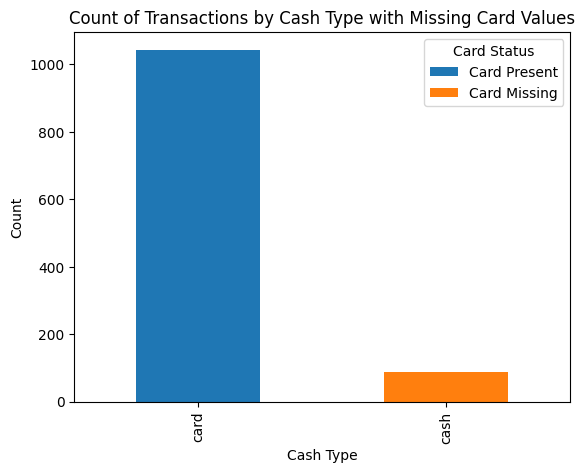

In [30]:
# Visualize the relationship between 'cash_type' and missing 'card' values
cash_type_counts.plot(kind='bar', stacked=True)
plt.xlabel('Cash Type')
plt.ylabel('Count')
plt.title('Count of Transactions by Cash Type with Missing Card Values')
plt.legend(['Card Present', 'Card Missing'], title='Card Status')
plt.show()

*The bar chart visualizes the count of transactions by cash type and the presence or absence of card values. It shows that all transactions recorded as 'card' have a valid card value, while transactions recorded as 'cash' do not have a card value. Missing card values are due to the transaction type rather than data issues. As the card column does not provide additional insights for our analysis, we can consider removing it to simplify the dataset.*

In [31]:
# Remove the 'card' column from the DataFrame
df = df.drop('card', axis=1)

In [32]:
# Verify that the 'card' column has been removed
print("Columns after removing the 'card' column:")
print(df.columns)

Columns after removing the 'card' column:
Index(['date', 'datetime', 'cash_type', 'money', 'coffee_name'], dtype='object')


#### Coffee Sales by Transaction Type and Coffee Type

In [33]:
cash_type_data = df[df['cash_type'] == 'card']

# Group by 'cash_type' and 'coffee_name', and count the occurrences
coffee_counts_by_transaction = (
    df.groupby(['cash_type', 'coffee_name'])
    .size()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)

coffee_counts_by_transaction = coffee_counts_by_transaction.rename(columns={
    'cash_type': 'Transaction Type',
    'coffee_name': 'Coffee Type',
    'Count': 'Count'
})

print('Number Coffee Sales by Transaction Type')
print(coffee_counts_by_transaction.to_string(index=False))

Number Coffee Sales by Transaction Type
Transaction Type         Coffee Type  Count
            card Americano with Milk    253
            card               Latte    218
            card          Cappuccino    181
            card           Americano    155
            card             Cortado     94
            card       Hot Chocolate     68
            card            Espresso     44
            card               Cocoa     31
            cash               Latte     25
            cash Americano with Milk     15
            cash          Cappuccino     15
            cash           Americano     14
            cash       Hot Chocolate      6
            cash             Cortado      5
            cash            Espresso      5
            cash               Cocoa      4


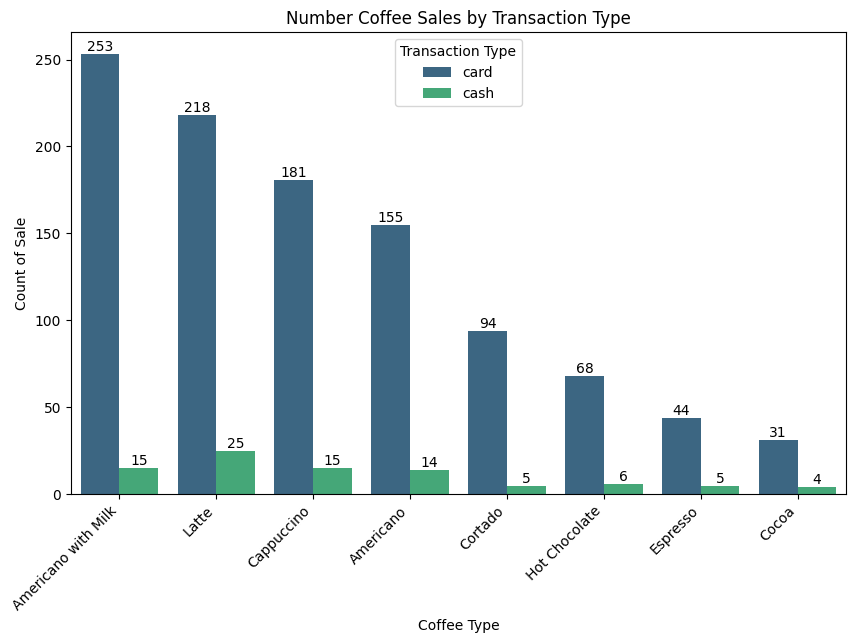

In [34]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Coffee Type', y='Count', hue='Transaction Type', data=coffee_counts_by_transaction, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.xlabel('Coffee Type')
plt.ylabel('Count of Sale')
plt.title('Number Coffee Sales by Transaction Type')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Transaction Type', loc='upper center')
plt.show()

*This plot displays the count of coffee sales for different coffee types in relation to the type of transaction.*

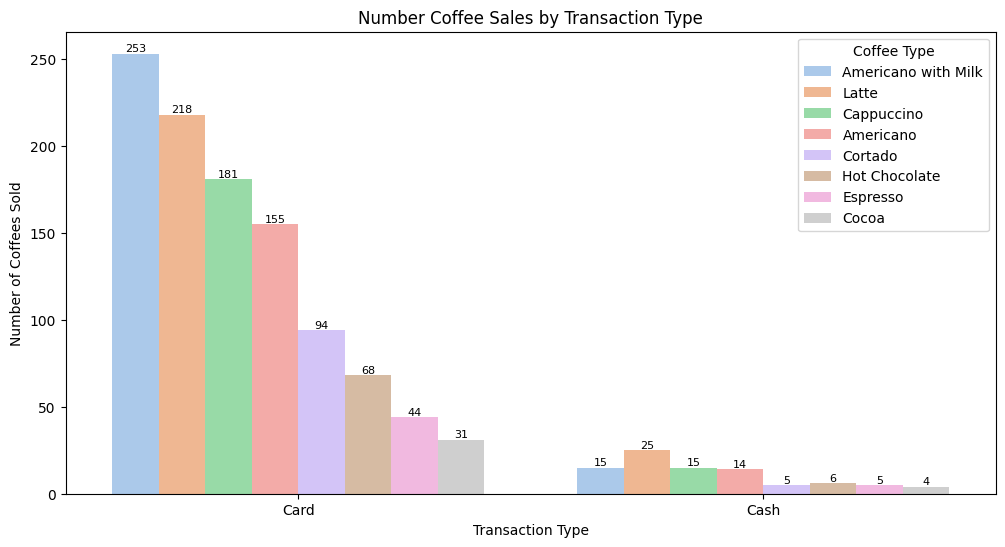

In [35]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette("pastel", n_colors=8)
ax = sns.barplot(x='Transaction Type', y='Count', hue='Coffee Type', data=coffee_counts_by_transaction, palette=palette)
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.xlabel('Transaction Type')
plt.ylabel('Number of Coffees Sold')
plt.title('Number Coffee Sales by Transaction Type')
plt.legend(title='Coffee Type')
plt.xticks(ticks=[0, 1], labels=['Card', 'Cash'])   
plt.show()

*This plot presents the total number of coffees sold by each transaction type, with a breakdown by coffee type. For card transactions, Americano with Milk (253), Latte (218) and Cappuccino (181) were the top three most frequently sold coffee types. In contrast, Cocoa had the lowest count at 31. For cash actions, Latte (25), Americano with Milk (15), and Cappuccino (15) had the highest counts, while Cocoa had the lowest count at 4.*

#### Total Revenue from Coffee Sales by Transaction Type and Coffee Type

In [36]:
# Group and aggregate the data by 'cash_type' and 'coffee_name'
sales_by_transaction_and_coffee_sort = (
    df.groupby(['cash_type', 'coffee_name'])['money']
    .sum()
    .reset_index()
    .sort_values(by='money', ascending=False)
)

sales_by_transaction_and_coffee_sort = sales_by_transaction_and_coffee_sort.rename(columns={
    'cash_type': 'Transaction Type',
    'coffee_name': 'Coffee Type',
    'money': 'Total Revenue'
})

print('Total Revenue from Coffee Sales by Transaction Type and Coffee Type')
print(sales_by_transaction_and_coffee_sort.to_string(index=False))

Total Revenue from Coffee Sales by Transaction Type and Coffee Type
Transaction Type         Coffee Type  Total Revenue
            card Americano with Milk        8083.94
            card               Latte        8018.14
            card          Cappuccino        6738.14
            card           Americano        4232.54
            card             Cortado        2595.08
            card       Hot Chocolate        2539.48
            card               Cocoa        1138.94
            cash               Latte         991.00
            card            Espresso         976.62
            cash          Cappuccino         595.00
            cash Americano with Milk         518.00
            cash           Americano         412.00
            cash       Hot Chocolate         239.00
            cash               Cocoa         157.00
            cash             Cortado         150.00
            cash            Espresso         124.00


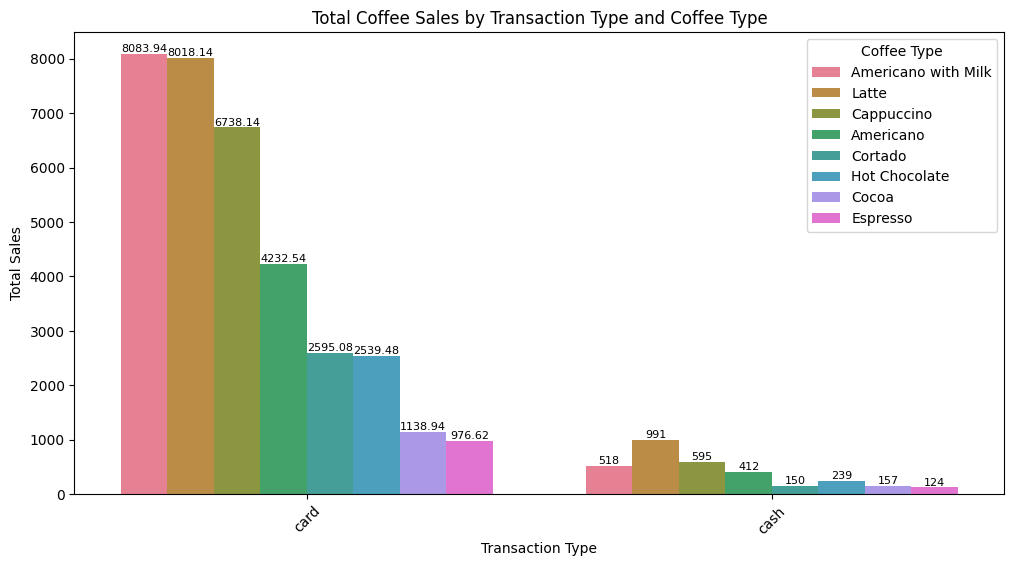

In [40]:
plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", n_colors=8)
ax = sns.barplot(x='Transaction Type', y='Total Revenue', hue='Coffee Type', data=sales_by_transaction_and_coffee_sort, palette=palette)

plt.xlabel('Transaction Type')
plt.ylabel('Total Sales')
plt.title('Total Coffee Sales by Transaction Type and Coffee Type')
for container in ax.containers:
    ax.bar_label(container, fontsize=8)
plt.xticks(rotation=45)  
plt.legend(title='Coffee Type')
plt.show()

*Americano with Milk (8083.94), Latte (8018.14) and Cappuccino (6738.14) generated the highest revenue among card transactions, while Espresso brought in the least revenue at 976.62. For cash transactions, Latte (991.00), Cappuccino (595.00), and Americano with Milk (518.00) generated the highest revenue, while Espresso brought in the least revenue at 124.00. Notably, Latte's revenue for cash transactions (991.00) exceeded the revenue of Espresso from card payments (976.62).*